In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import scanpy as sc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from scipy.io import arff
import ntpath
import glob
import os
import sys
import math
import statistics
# !pip install liac-arff
#import arff

from sklearn.model_selection import train_test_split
from random import randrange
from itertools import combinations as comb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import string
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import sklearn.metrics as mt


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from math import modf
from joblib import Parallel, delayed


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
!pip install scikit-plot
#import scikitplot as skplt

In [ ]:
file_name ='FB'

In [ ]:
import pickle
# Load object from file
with open(gdrivePath +os.sep + "results" +os.sep+"Classification" +os.sep+"FB" +os.sep+file_name+'dfs.pkl', 'rb') as f:
    dfs = pickle.load(f)
with open(gdrivePath +os.sep + "results" +os.sep+"Classification" +os.sep+"FB" +os.sep+file_name+'predictions_proba.pkl', 'rb') as f:
    predictions_proba = pickle.load(f)
with open(gdrivePath +os.sep + "results" +os.sep+"Classification" +os.sep+"FB" +os.sep+file_name+'predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)
with open(gdrivePath +os.sep + "results" +os.sep+"Classification" +os.sep+"FB" +os.sep+file_name+'y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open(gdrivePath +os.sep + "results" +os.sep+"Classification" +os.sep+"FB" +os.sep+file_name+'y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)



In [ ]:
predictions

[array([4, 4, 9, ..., 3, 5, 3])]

In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)
display(dict(zip(unique_values, counts)),np.max(counts))

{0: 11,
 1: 272,
 2: 57,
 3: 974,
 4: 738,
 5: 190,
 6: 340,
 7: 58,
 8: 4,
 9: 85,
 10: 11,
 11: 5,
 12: 16,
 13: 37,
 14: 35,
 15: 2}

974

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
def result(ytest, pre, dfs, file_name):#proba
    for i in range(0, 1):
        print('\033[91m' '\033[1m' + dfs["Name"][i] + '\033[0m')
        report_dict = classification_report(ytest, pre[i],digits=4)
        print(report_dict)
        #micro_precision, micro_recall, micro_fscore, _ = score(ytest, pre[i], average='micro')
        #print('micro_precision:',micro_precision,"micro_recall:",micro_recall,"micro_fscore",micro_fscore)
    # Confusion matrix
    f, axes = plt.subplots(1, 2, figsize=(15, 5), sharey='row')
    for i in range(0, 1):
        cm = confusion_matrix(ytest, pre[i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], xticks_rotation=45)
        disp.ax_.set_title(dfs["Name"][i])
        disp.im_.colorbar.remove()
        disp.ax_.set_xlabel('')
        if i != 0:
            disp.ax_.set_ylabel('')
    f.text(0.8, 0.8, 'Predicted label', ha='left')
    plt.subplots_adjust(wspace=0.00001, hspace=0.001)
    f.colorbar(disp.im_, ax=axes)
    plt.savefig(gdrivePath + os.sep + "figures" + os.sep + "confusion_matrix" + os.sep + file_name, format='svg')
    #plt.close()


Original

Random_Forest
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     0.9480    0.9375    0.9427       272
           2     0.9483    0.9649    0.9565        57
           3     0.9455    0.9805    0.9627       974
           4     0.9477    0.9580    0.9528       738
           5     0.9563    0.9211    0.9383       190
           6     0.9398    0.9176    0.9286       340
           7     1.0000    0.9310    0.9643        58
           8     0.0000    0.0000    0.0000         4
           9     0.8767    0.7529    0.8101        85
          10     1.0000    0.9091    0.9524        11
          11     1.0000    0.8000    0.8889         5
          12     0.8421    1.0000    0.9143        16
          13     0.8947    0.9189    0.9067        37
          14     0.9259    0.7143    0.8065        35
          15     0.0000    0.0000    0.0000         2

    accuracy                         0.9439      2835
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


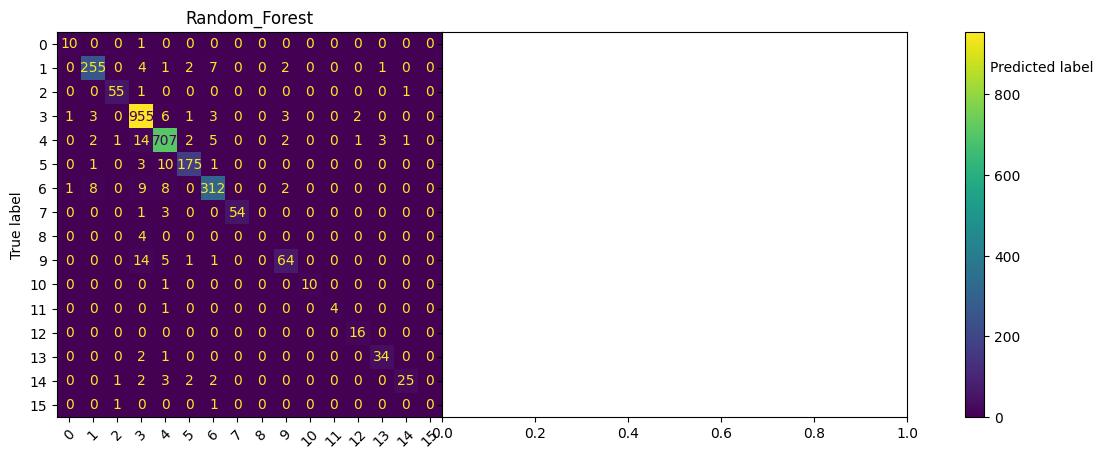

In [ ]:
result(y_test,predictions,dfs,"originalValues.svg")

ctGAN

Random_Forest
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     0.9586    0.9375    0.9480       272
           2     0.9180    0.9825    0.9492        57
           3     0.9530    0.9795    0.9661       974
           4     0.9503    0.9593    0.9548       738
           5     0.9617    0.9263    0.9437       190
           6     0.9511    0.9147    0.9325       340
           7     1.0000    0.9483    0.9735        58
           8     0.0000    0.0000    0.0000         4
           9     0.8642    0.8235    0.8434        85
          10     0.9091    0.9091    0.9091        11
          11     0.7143    1.0000    0.8333         5
          12     0.8421    1.0000    0.9143        16
          13     0.8947    0.9189    0.9067        37
          14     0.9259    0.7143    0.8065        35
          15     1.0000    1.0000    1.0000         2

    accuracy                         0.9478      2835
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


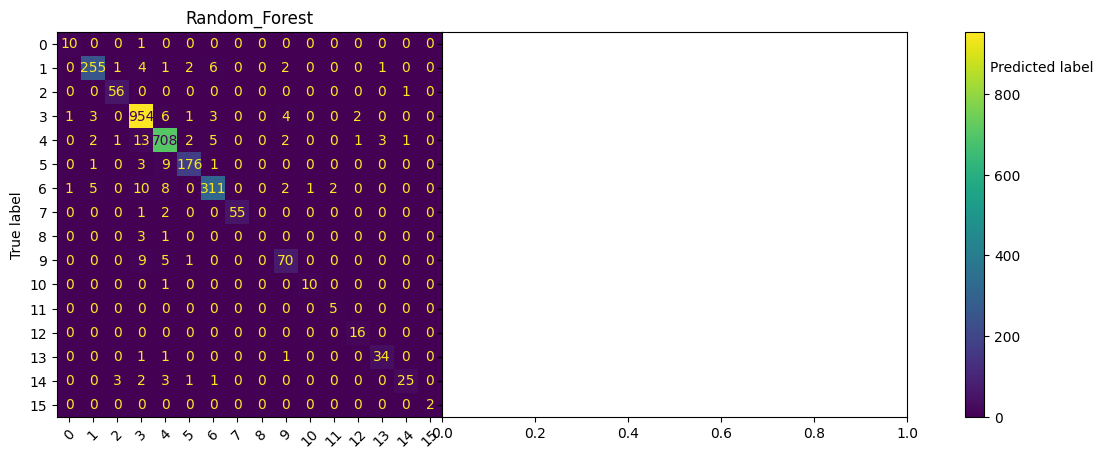

In [ ]:
result(y_test,predictions,dfs,"CTGAN.svg")

TVAE

Random_Forest
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     0.9476    0.9301    0.9388       272
           2     0.9016    0.9649    0.9322        57
           3     0.9436    0.9795    0.9612       974
           4     0.9516    0.9593    0.9555       738
           5     0.9563    0.9211    0.9383       190
           6     0.9450    0.9088    0.9265       340
           7     1.0000    0.9483    0.9735        58
           8     0.0000    0.0000    0.0000         4
           9     0.8784    0.7647    0.8176        85
          10     0.9167    1.0000    0.9565        11
          11     0.8333    1.0000    0.9091         5
          12     0.8421    1.0000    0.9143        16
          13     0.8889    0.8649    0.8767        37
          14     0.8929    0.7143    0.7937        35
          15     0.0000    0.0000    0.0000         2

    accuracy                         0.9429      2835
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


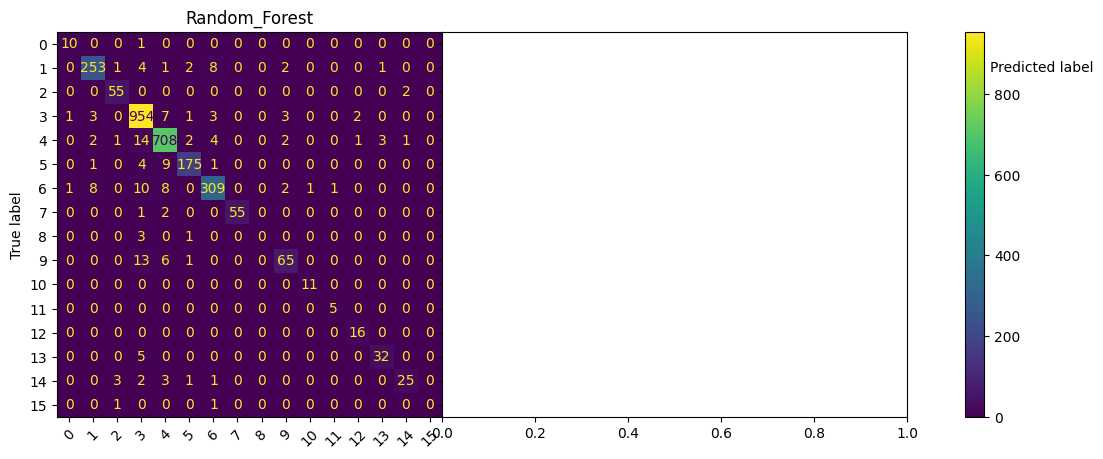

In [ ]:
result(y_test,predictions,dfs,"TVAE.svg")

GC

Random_Forest
              precision    recall  f1-score   support

           0     0.8182    0.8182    0.8182        11
           1     0.9513    0.9338    0.9425       272
           2     0.9333    0.9825    0.9573        57
           3     0.9427    0.9805    0.9612       974
           4     0.9515    0.9580    0.9548       738
           5     0.9560    0.9158    0.9355       190
           6     0.9313    0.9176    0.9244       340
           7     1.0000    0.9310    0.9643        58
           8     0.0000    0.0000    0.0000         4
           9     0.8750    0.7412    0.8025        85
          10     1.0000    1.0000    1.0000        11
          11     1.0000    1.0000    1.0000         5
          12     0.8421    1.0000    0.9143        16
          13     0.8857    0.8378    0.8611        37
          14     0.9286    0.7429    0.8254        35
          15     0.0000    0.0000    0.0000         2

    accuracy                         0.9429      2835
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


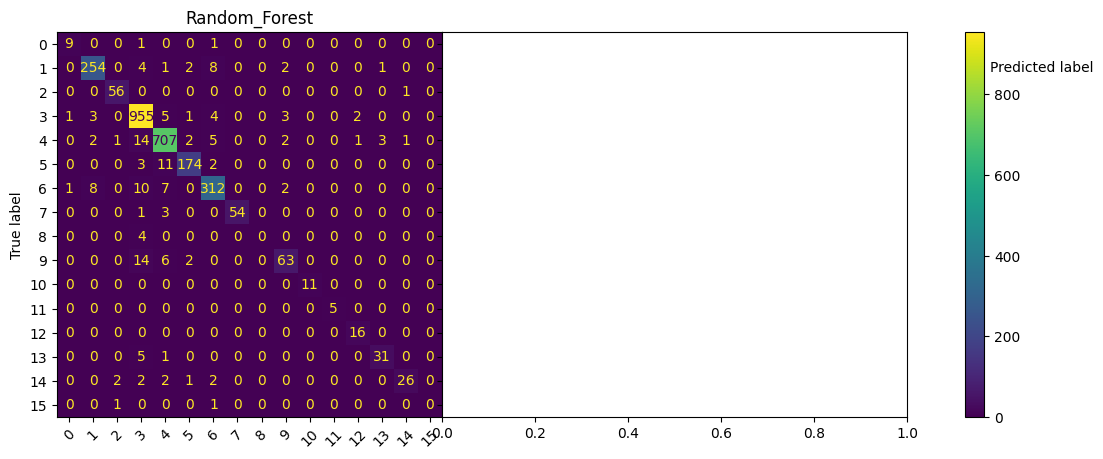

In [ ]:
result(y_test,predictions,dfs,"GC.svg")

FB

Random_Forest
              precision    recall  f1-score   support

           0     0.8333    0.9091    0.8696        11
           1     0.9547    0.9301    0.9423       272
           2     0.9492    0.9825    0.9655        57
           3     0.9502    0.9805    0.9651       974
           4     0.9555    0.9607    0.9581       738
           5     0.9669    0.9211    0.9434       190
           6     0.9448    0.9059    0.9249       340
           7     1.0000    0.9483    0.9735        58
           8     0.0000    0.0000    0.0000         4
           9     0.8625    0.8118    0.8364        85
          10     0.8462    1.0000    0.9167        11
          11     0.7143    1.0000    0.8333         5
          12     0.8421    1.0000    0.9143        16
          13     0.8947    0.9189    0.9067        37
          14     0.9355    0.8286    0.8788        35
          15     1.0000    1.0000    1.0000         2

    accuracy                         0.9478      2835
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


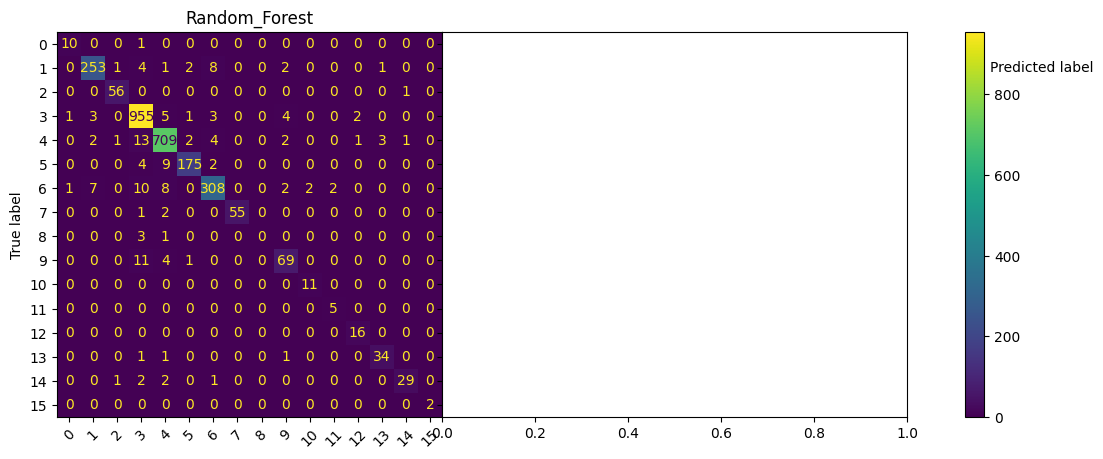

In [ ]:
result(y_test,predictions,dfs,"FB.svg")